<a href="https://colab.research.google.com/github/redun1/ML_Data/blob/main/(Iris)GROUPProject3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

#Standardizing Feature values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar=StandardScaler()

In [ ]:
#standardizing all the feature columns except for the target column, this being 'Species'
scalar.fit(df.drop('Species', axis=1))

StandardScaler()

In [ ]:
#stores all of the values for the features of our data set, not including the target column ('Species')
scaled_features=scalar.transform(df.drop('Species',axis=1))

In [ ]:
#creates new dataFrame that no longer includes target column ('Species')
df_feature= pd.DataFrame(scaled_features, columns=df.columns[:-1]) 

In [ ]:
df_feature.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


#Splitting dataset into test and train subsets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(scaled_features, df['Species'], test_size=0.3) 

#K Value and Accuracy

In [ ]:
score=[]

In [ ]:
for i in range(1,40): 
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  score.append(metrics.accuracy_score(y_test,y_pred))        

print(score) #to measure the accuracy of each of the iterations

[1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333

TypeError: ignored

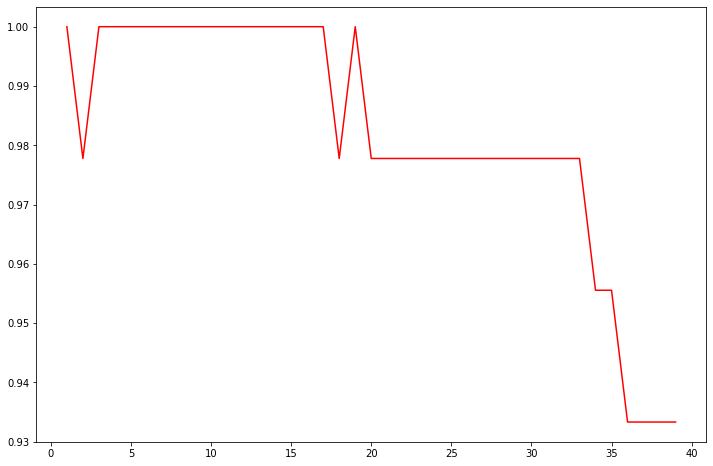

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), score, color='red')
plt.xlabel('Value of K for KNN') 
plt.ylabel('Testing Accuracy')

#Determining optimal K size (assessing error rate per K value)

In [ ]:
error_rate=[]

for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

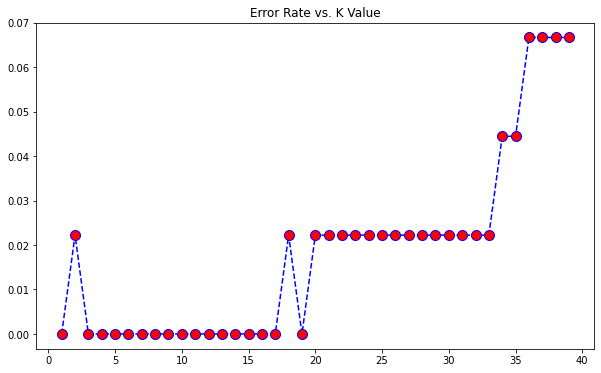

In [ ]:
#display error rate against k value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Value of K for KNN')  
plt.ylabel('Error Rate')

#Classify using split data subsets

In [ ]:
#building the KNN classifier model
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
#training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#stores the predicted y_test values (y_test_predict)
predict=knn.predict(X_test)

#Assess model performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

####Confusion Matrix

In [ ]:
print(confusion_matrix(y_test, predict))  # (true data aka y_test, your predictions(aka predict))

[[12  0  0]
 [ 0 10  0]
 [ 0  0 23]]


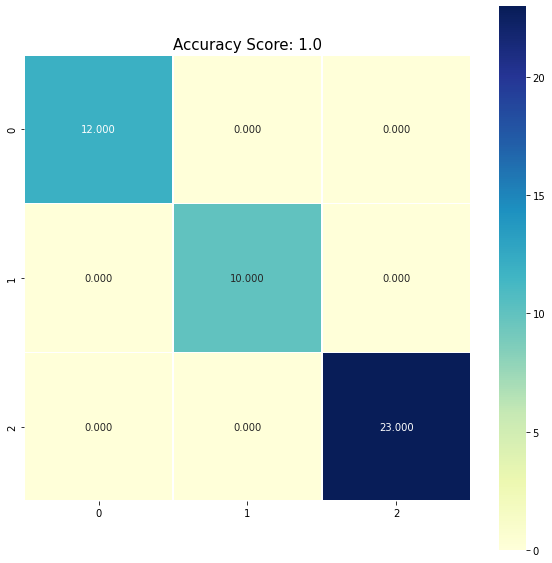

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
#our knn model had a 100% accuracy score in classifiying the proper target class

####Classification Report

In [ ]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        23

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



#Run model with k=36

In [193]:
#building the KNN classifier model
knn=KNeighborsClassifier(n_neighbors=36)

In [194]:
#training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

In [195]:
#stores the predicted y_test values (y_test_predict)
predict=knn.predict(X_test)

In [196]:
print(confusion_matrix(y_test, predict))  # (true data aka y_test, your predictions(aka predict))

[[12  0  0]
 [ 0 10  0]
 [ 0  3 20]]


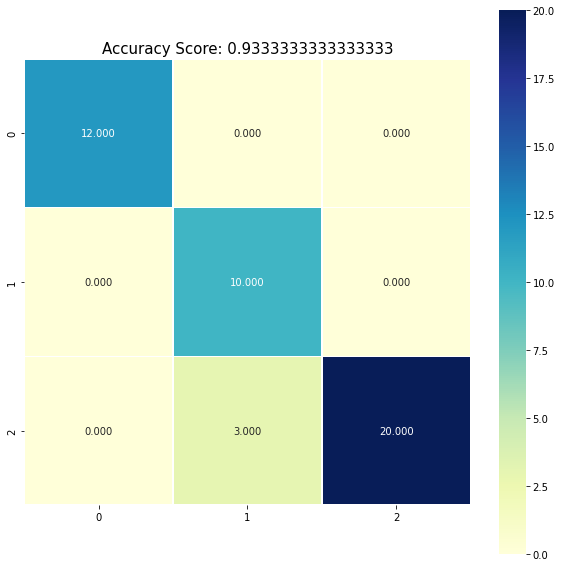

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu')
plt.ylabel=('Actual label')
plt.xlabel=('Predicted label')
all_sample_title = f'Accuracy Score: {knn.score(X_test,y_test)}'
plt.title(all_sample_title, size = 15);
#our knn model had a 100% accuracy score in classifiying the proper target class

In [198]:
print(classification_report(y_test, predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.77      1.00      0.87        10
 Iris-virginica       1.00      0.87      0.93        23

       accuracy                           0.93        45
      macro avg       0.92      0.96      0.93        45
   weighted avg       0.95      0.93      0.94        45



#####We see that when k=36, the accuracy score of this knn classifier model decreases by approximately 7%